In [1]:
# path to user functions
import sys  
sys.path.append('../Src/')

from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import importlib 

# import user functions
import UserUtilityFunctions as uf
import UserStatisticalFunctions as usf
import UserVisualization as uv

# set seaborn theme
sns.set_theme()

# initializing variables
REMOVE = '** REMOVE ** 3 Prep'
RANDOM_STATE = 1776

# initialize DataFrame
df_remove = pd.DataFrame(columns=['column'])
df_unknown = pd.DataFrame(columns=['column'])

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# import data
df = pd.read_pickle("../Data/New_Heart.pkl")
df_label = pd.read_pickle("../Data/New_Label.pkl")
df_can = pd.read_pickle("../Data/New_CAN.pkl")
df_don = pd.read_pickle("../Data/New_DON.pkl")
df_drop = pd.read_pickle("../Data/New_DROP.pkl")
df_both = pd.read_pickle("../Data/New_Both.pkl")
df_nominal = pd.read_pickle("../Data/New_Nominal.pkl")
df_ordinal = pd.read_pickle("../Data/New_Ordinal.pkl")
df_numeric = pd.read_pickle("../Data/New_Numeric.pkl")
df_object = pd.read_pickle("../Data/New_Object.pkl")
df_unknown = pd.read_pickle("../Data/New_Unknown.pkl")
df_date = pd.read_pickle("../Data/New_Date.pkl")
df_dict = pd.read_pickle("../Data/New_Dictionary.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

## Wrangle Dataset

In [3]:
print(f"Heart Dataset Rows: {df.shape[0]:,} & Columns: {df.shape[1]:,}")
print(f"Label Features: {df_label.shape[0]:,}")
print(f"Candidate Features: {df_can.shape[0]:,}")
print(f"Donor Features: {df_don.shape[0]:,}")
print(f"Date Features: {df_date.shape[0]:,}")
print(f"Both Features: {df_both.shape[0]:,}")
print(f"Unknown Features: {df_unknown.shape[0]:,}")
print(f"Object Features: {df_object.shape[0]:,}")
print(f"Removed Features: {df_drop.shape[0]:,}")

Heart Dataset Rows: 28,751 & Columns: 306
Label Features: 15
Candidate Features: 133
Donor Features: 102
Date Features: 14
Both Features: 7
Unknown Features: 16
Object Features: 11
Removed Features: 29


In [4]:
# all label features
labelCols = df_label.column.to_list()

# display
df[labelCols].head()

,AcuteRejectionEpisode,AirwayDehiscencePostTransplant,StrokePostTransplant,PacemakerPostTransplant,DialysisPostDischarge,GraftFailStatus,GraftLifeSpanDay,LastFollowupNumber,GraftStatus,TransplantStatus,TransplantSurvivalDay,RecipientStatus,RejectionTreatmentWithinOneYear,FunctionalStatusFollowUp,LengthOfStay
0,No,No,No,No,Yes,Failure,329.0,999,No,Dead,329.0,Dead,No,"100% - Normal, no complaints, no evidence of disease",76.0
1,No,No,No,No,No,Success,2592.0,80,Yes,Alive,2592.0,Living,Missing,Unknown,10.0
2,No,No,No,No,No,Success,2913.0,80,Yes,Alive,2913.0,Living,No,Unknown,21.0
3,"Yes, at least one episode treated with anti-rejection agent",No,No,No,No,Failure,1225.0,999,No,Dead,1225.0,Dead,Yes,"30% - Severely disabled: hospitalization is indicated, death not imminent",32.0
4,No,No,No,No,No,Success,2785.0,80,Yes,Alive,2785.0,Living,No,Unknown,26.0


In [5]:
# all label features
removeCols = df_drop.column.to_list()

# display
df[removeCols].head()

,BMI_CALC,BMI_TCR,INIT_BMI_CALC,INIT_WGT_KG_CALC,WGT_KG_CALC,WGT_KG_TCR,HGT_CM_CALC,HGT_CM_TCR,INIT_HGT_CM_CALC,PROS_INFUS_TCR,PROSTACYCLIN_TCR,PROS_INFUS_TRR,PROSTACYCLIN_TRR,ORGAN,RECOV_OUT_US,LT_ONE_WEEK_DON,DATA_TRANSPLANT,DATA_WAITLIST,INIT_LLU_FLG,INIT_RLU_FLG,INIT_BLU_FLG,END_LLU_FLG,END_RLU_FLG,END_BLU_FLG,ReceivedDeceasedDonorTramsplant_CAN,TransplantProcedure_CAN,TransplantYear,DeceasedOrLiving_DON,TXHRT
0,21.9,22.0470,22.0,65.8,65.3,65.771,172.7,173.0,172.7,0,0,0,0,HR,N,N,Y,Y,0.0,0.0,0.0,0,0,0,1,Heart,2013,Deceased Donor,Yes
1,27.6,21.1093,21.1,72.6,94.8,72.575,185.4,185.0,185.4,0,0,0,0,HR,N,N,Y,Y,0.0,0.0,0.0,0,0,0,1,Heart,2013,Deceased Donor,Yes
2,29.5,34.5096,34.5,106.0,90.7,106.000,175.3,175.0,175.3,0,0,0,0,HR,N,N,Y,Y,0.0,0.0,0.0,0,0,0,1,Heart,2013,Deceased Donor,Yes
3,35.7,35.0335,35.0,111.0,113.0,111.000,177.8,178.0,178.0,0,0,0,0,HR,N,N,Y,Y,0.0,0.0,0.0,0,0,0,1,Heart,2013,Deceased Donor,Yes
4,24.1,24.3375,24.3,72.0,72.0,72.000,173.0,172.0,172.0,0,0,0,0,HR,N,N,Y,Y,0.0,0.0,0.0,0,0,0,1,Heart,2013,Deceased Donor,Yes


In [6]:
# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_remove, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 0 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 1 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 0 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['BMI_CALC', 'BMI_TCR', 'DATA_TRANSPLANT', 'DATA_WAITLIST', 'DeceasedOrLiving_DON', 'END_BLU_FLG', 'END_LLU_FLG', 'END_RLU_FLG', 'HGT_CM_CALC', 'HGT_CM_TCR', 'INIT_BLU_FLG', 'INIT_BMI_CALC', 'INIT_HGT_CM_CALC', 'INIT_LLU_FLG', 'INIT_RLU_FLG', 'INIT_WGT_KG_CALC', 'LT_ONE_WEEK_DON', 'ORGAN', 'PROSTACYCLIN_TCR', 'PROSTACYCLIN_TRR', 'PROS_INFUS_TCR', 'PROS_INFUS_TRR', 'RECOV_OUT_US', 'ReceivedDeceasedDonorTramsplant_CAN', 'TXHRT', 'TransplantProcedure_CAN', 'TransplantYear', 'WGT_KG_CALC', 'WGT_KG_TCR'

In [7]:
# unknow features
df[df_unknown.column.to_list()].head()

,DAYS_STAT1,StatusDays_1A,StatusDays_1B,StatusDays_2,StatusDays_1,StatusDays_A2,StatusDays_A3,StatusDays_A4,StatusDays_A5,StatusDays_A6,LastInactiveStatusReason,InitialWaitingListStatusCode_CAN,ReasonRemovalWaitingList_CAN,STATUS_TRR,STATUS_TCR,STATUS_DDR
0,0,11,0,0,0,0,0,0,0,0,NaN,HR: Status 1A,"Deceased Donor tx, removed by tx center",V,V,V
1,0,3,263,0,0,0,0,0,0,0,11.0,HR: Status 1A,"Deceased Donor tx, removed by tx center",V,V,V
2,0,53,2,0,0,0,0,0,0,0,NaN,HR: Status 1A,"Deceased Donor tx, removed by tx center",V,V,V
3,0,96,296,0,0,0,0,0,0,0,NaN,HR: Status 1A,"Deceased Donor tx, removed by tx center",V,V,V
4,0,19,23,0,0,0,0,0,0,0,NaN,HR: Status 1B,"Deceased Donor tx, removed by tx center",V,V,V


In [8]:
df_dict[df_dict.Feature.isin(df_unknown.column.to_list())]

,Feature,Description,Form,FeatureStartDate,FeatureEndDate,FormSection,DataType,SASAnalysisFormat,Comment,OrginalFeature,FeatureType,Information
52,DAYS_STAT1,DAYS IN STATUS 1,CALCULATED,NaT,NaT,,NUM,,,DAYS_STAT1,Nemeric,** UNKNOWN **
53,StatusDays_1A,DAYS IN STATUS 1A,CALCULATED,NaT,NaT,,NUM,,,DAYS_STAT1A,Nemeric,** UNKNOWN **
54,StatusDays_1B,DAYS IN STATUS 1B,CALCULATED,NaT,NaT,,NUM,,,DAYS_STAT1B,Nemeric,** UNKNOWN **
55,StatusDays_2,DAYS IN STATUS 2,CALCULATED,NaT,NaT,,NUM,,,DAYS_STAT2,Nemeric,** UNKNOWN **
56,StatusDays_1,DAYS IN ADULT STATUS 1,CALCULATED,2018-10-18,NaT,,NUM,,,DAYS_STATA1,Nemeric,** UNKNOWN **
57,StatusDays_A2,DAYS IN ADULT STATUS 2,CALCULATED,2018-10-18,NaT,,NUM,,,DAYS_STATA2,Nemeric,** UNKNOWN **
58,StatusDays_A3,DAYS IN ADULT STATUS 3,CALCULATED,2018-10-18,NaT,,NUM,,,DAYS_STATA3,Nemeric,** UNKNOWN **
59,StatusDays_A4,DAYS IN ADULT STATUS 4,CALCULATED,2018-10-18,NaT,,NUM,,,DAYS_STATA4,Nemeric,** UNKNOWN **
60,StatusDays_A5,DAYS IN ADULT STATUS 5,CALCULATED,2018-10-18,NaT,,NUM,,,DAYS_STATA5,Nemeric,** UNKNOWN **
61,StatusDays_A6,DAYS IN ADULT STATUS 6,CALCULATED,2018-10-18,NaT,,NUM,,,DAYS_STATA6,Nemeric,** UNKNOWN **


In [9]:
# to be removed
removeCols = df_unknown.column.to_list()

# remove features
df, df_dict, df_label, df_can, df_don, df_both, df_ordinal, df_nominal, df_numeric, df_drop, df_object, df_unknown, df_date = uf.HouseKeeping(df, removeCols, df_dict, df_label, df_can,\
                                                                df_don, df_both, df_ordinal, df_nominal, df_numeric, df_remove, df_object, df_unknown, df_date, txt=REMOVE, display=True)

Data Dictionary Updated.
Remove 0 row(s) from df_label DataFrame.
Remove 0 row(s) from df_can DataFrame.
Remove 0 row(s) from df_don DataFrame.
Remove 0 row(s) from df_both DataFrame.
Remove 0 row(s) from df_ordinal DataFrame.
Remove 0 row(s) from df_nominal DataFrame.
Remove 0 row(s) from df_numeric DataFrame.
Remove 0 row(s) from df_drop DataFrame.
Remove 0 row(s) from df_object DataFrame.
Remove 16 row(s) from df_unknown DataFrame.
Remove 0 row(s) from df_date DataFrame.

Removed Features: ['DAYS_STAT1', 'InitialWaitingListStatusCode_CAN', 'LastInactiveStatusReason', 'ReasonRemovalWaitingList_CAN', 'STATUS_DDR', 'STATUS_TCR', 'STATUS_TRR', 'StatusDays_1', 'StatusDays_1A', 'StatusDays_1B', 'StatusDays_2', 'StatusDays_A2', 'StatusDays_A3', 'StatusDays_A4', 'StatusDays_A5', 'StatusDays_A6']

Total Row(s) & Column(s) Before Removing Column(s): 28,751 & columns: 277
Total Row(s) & Column(s) After Removing Column(s): 28,751 & columns: 261


In [10]:
# date describe
df[df_date.column.to_list()].describe().T

,count,mean,min,25%,50%,75%,max,std
AllocationBeginDate_CAN,28751,2016-06-02 19:32:20.676846080,1995-01-20 00:00:00,2013-09-18 00:00:00,2016-08-17 00:00:00,2019-04-15 00:00:00,2021-12-28 00:00:00,NaN
AdmissionDate_CAN,28370,2016-12-12 04:32:37.222418176,2001-05-01 00:00:00,2014-06-01 00:00:00,2017-03-21 00:00:00,2019-08-16 00:00:00,2021-12-24 00:00:00,NaN
AdmissionDate_DON,28715,2017-01-17 06:45:08.744558336,1960-11-24 00:00:00,2014-06-30 00:00:00,2017-04-28 00:00:00,2019-09-28 12:00:00,2021-12-28 00:00:00,NaN
ValidationDateTCR_CAN,21058,1994-04-14 00:06:47.153821056,1987-10-20 00:00:00,1993-10-22 00:00:00,1995-02-28 00:00:00,1995-06-08 00:00:00,2015-04-07 19:24:14,NaN
ValidationDateTRR_CAN,28249,2017-02-18 21:09:12.229783040,2011-01-13 15:37:00,2014-08-12 15:44:18,2017-05-30 11:17:45,2019-10-11 10:24:04,2021-12-30 14:14:46,NaN
ValidationDateTCR_DDR,28522,2017-02-06 01:11:59.139260416,2011-01-06 12:43:10,2014-07-23 14:53:37.249999872,2017-05-17 12:15:05,2019-10-10 14:26:18,2021-12-31 15:58:11,NaN
ListingYear,28751.0,2015.963758,1997.0,2013.0,2016.0,2019.0,2021.0,3.336659
CenterDischargeDate_CAN,27924,2017-01-11 17:37:00.025784320,2011-01-07 00:00:00,2014-07-09 00:00:00,2017-04-19 00:00:00,2019-09-11 00:00:00,2021-12-30 00:00:00,NaN
RemovalWaitListDate_CAN,28751,2017-01-25 03:06:28.035198720,2011-01-01 00:00:00,2014-07-08 00:00:00,2017-05-06 00:00:00,2019-10-05 00:00:00,2021-12-31 00:00:00,NaN
InitialWaitListDate_CAN,28751,2016-06-17 23:21:02.022190592,1997-04-29 00:00:00,2013-10-09 12:00:00,2016-08-30 00:00:00,2019-04-24 00:00:00,2021-12-28 00:00:00,NaN


### ListingYear

In [11]:
uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')

RecipientStatus,Dead,Living,Lost to Follow Up,Missing,Retransplanted,Row Total,Dead %,Living %
ListingYear,,,,,,,,
1997,1.0,0.0,0.0,0.0,0.0,1.0,100.000000,0.000000
1998,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,100.000000
1999,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,100.000000
2000,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,100.000000
2001,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000
2002,0.0,2.0,0.0,0.0,0.0,2.0,0.000000,100.000000
2003,1.0,2.0,0.0,0.0,0.0,3.0,33.333333,66.666667
2004,4.0,6.0,0.0,0.0,0.0,10.0,40.000000,60.000000
2005,2.0,6.0,0.0,0.0,0.0,8.0,25.000000,75.000000


### List Year > 2010

In [12]:
# selection
df = df[df.ListingYear > 2010]

### Plot

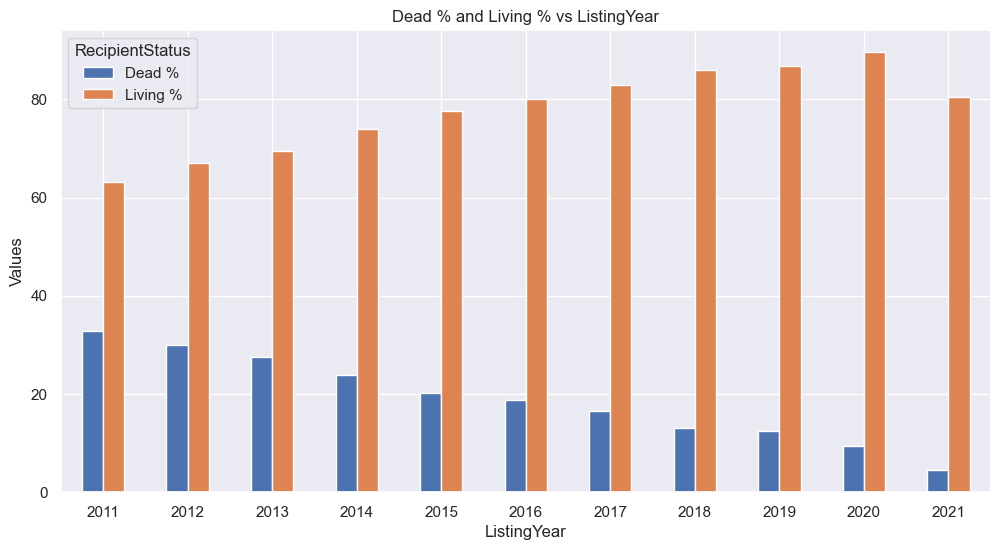

In [13]:
# get table into DataFrame
data = uf.categoryContingency(df, 'ListingYear', 'RecipientStatus')
# exclude the last row
data = data.iloc[:-1]

# 'Dead %' or 'Living %'
data = data[['Dead %', 'Living %']]

# Plotting the bar plot
data.plot(kind='bar', figsize=(12,6))
plt.title('Dead % and Living % vs ListingYear')
plt.xlabel('ListingYear')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

In [14]:
# determine ListingYear year & counts
df.ListingYear.value_counts().sort_index(ascending=True)

ListingYear
2011    2018
2012    2148
2013    2257
2014    2419
2015    2526
2016    2638
2017    2644
2018    2751
2019    2873
2020    2749
2021    2471
Name: count, dtype: int64

In [15]:
# heart dataset
uf.writeToFile(df, 'Clean_Heart',path='../Data/', format='pkl')

# heart label
uf.writeToFile(df_label, 'Clean_Label',path='../Data/', format='pkl')

# heart candidate
uf.writeToFile(df_can, 'Clean_CAN', format='pkl')

# heart donor
uf.writeToFile(df_don, 'Clean_DON', format='pkl')

# heart both
uf.writeToFile(df_both, 'Clean_BOTH', format='pkl')

# heart nominal
uf.writeToFile(df_nominal, 'Clean_Nominal', format='pkl')

# heart ordinal
uf.writeToFile(df_ordinal, 'Clean_Ordinal', format='pkl')

# heart numeric
uf.writeToFile(df_numeric, 'Clean_Numeric', format='pkl')

# heart object
uf.writeToFile(df_object, 'Clean_Object', format='pkl')

# heart date
uf.writeToFile(df_date, 'Clean_Date', format='pkl')

# heart unknown
uf.writeToFile(df_unknown, 'Clean_Unknown', format='pkl')

# heart drop
uf.writeToFile(df_unknown, 'Clean_Drop', format='pkl')

# heart date
uf.writeToFile(df_date, 'Clean_Date', format='pkl')

# heart data dictionary
uf.writeToFile(df_dict, 'Clean_Dictionary', format='pkl')

27,494 records written to ../Data/Clean_Heart.pkl
15 records written to ../Data/Clean_Label.pkl
133 records written to ../Data/Clean_CAN.pkl
102 records written to ../Data/Clean_DON.pkl
6 records written to ../Data/Clean_BOTH.pkl
169 records written to ../Data/Clean_Nominal.pkl
21 records written to ../Data/Clean_Ordinal.pkl
45 records written to ../Data/Clean_Numeric.pkl
11 records written to ../Data/Clean_Object.pkl
14 records written to ../Data/Clean_Date.pkl
0 records written to ../Data/Clean_Unknown.pkl
0 records written to ../Data/Clean_Drop.pkl
14 records written to ../Data/Clean_Date.pkl
302 records written to ../Data/Clean_Dictionary.pkl
